<a href="https://colab.research.google.com/github/charlesm93/stanTutorial/blob/main/Nordic_Prob_AI/CourseScript_probAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nording Probabilistic AI summer school: Monte Carlo methods

2024. Instructor: Charles Margossian

This notebook contains R scripts to do the exercises. Throughout, we will use Stan. The scripts below install Stan, as well as some other useful packages.

In [47]:
rm(list = ls())
gc()

set.seed(1954)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1470258,78.6,2643336,141.2,2643336,141.2
Vcells,2809905,21.5,10146329,77.5,10146317,77.5


In [33]:
# Set size of output plots (adjust to your preferences)
options(repr.plot.width = 7, repr.plot.height = 3.5, repr.plot.res = 200)

## Install requisite packages

In [2]:
install_packages <- TRUE
if (install_packages) {
  install.packages("rjson")
  install.packages("posterior")
  install.packages("bayesplot")
  install.packages("outbreaks")
  install.packages("loo")
  install.packages("gridExtra")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘checkmate’, ‘tensorA’, ‘distributional’, ‘matrixStats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘ggridges’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
if (install_packages) {
  install.packages("cmdstanr", repos = c("https://mc-stan.org/r-packages/", getOption("repos")))
  library(cmdstanr)
  install_cmdstan()
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.0

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



## Load packages

In [4]:
library(rjson)
library(bayesplot)
library(posterior)
library(ggplot2)
library(cmdstanr)
library(parallel)
library(loo)
library(outbreaks)
library(gridExtra)

This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

This is posterior version 1.5.0


Attaching package: ‘posterior’


The following object is masked from ‘package:bayesplot’:

    rhat


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


This is loo version 2.7.0

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 



In [5]:
mc.cores = detectCores()

Upload the `tools_is.r` from your computer and then source it.

In [6]:
source("tools_is.r")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tools_is.r': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## Bayesian Linear Regression



In [7]:
data <- list(N = 10,
             x = 1:10,
             y = c(12.03037, 13.86786, 16.00795, 18.29419, 20.26679, 22.38664,
                   23.95751, 25.71993, 28.09961, 30.46859))

# define starting distribution
init <- function() {
  list(sigma = rgamma(1, 1),
       beta = rnorm(1, mean = 1, sd = 1))
}

In [9]:
# transpile (translate Stan to C++ and then compile)
mod <- cmdstan_model("model/linear.stan")

In [10]:
# run sampler
n_chains <- 4
fit <- mod$sample(data = data, chains = n_chains,
                  init = init,
                  save_warmup = TRUE,
                  parallel_chains = detectCores())


Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9116c1a6da.stan', line 16, column 2 to column 22)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9116c1a6da.stan', line 16, column 2 to column 22)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warn

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9116c1a6da.stan', line 16, column 2 to column 22)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9116c1a6da.stan', line 16, column 2 to column 22)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warn

Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%] 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9116c1a6da.stan', line 16, column 2 to column 22)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9116c1a6da.stan', line 16, column 2 to column 22)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warn

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9116c1a6da.stan', line 16, column 2 to column 22)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.9 seconds.



In [11]:
# Examine Stan's default summaries
fit$summary()

variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,-27.139964,-26.800050,1.0991658,0.7660594,-29.2632700,-26.116770,1.0009465,1651.552,2087.253
beta,3.323817,3.335100,0.2324349,0.2176976,2.9252535,3.682500,1.0026038,1988.090,1625.362
sigma,4.457429,4.321335,0.9370381,0.8327838,3.2225865,6.110596,0.9997559,2117.602,2085.581
y_pred[1],3.245469,3.256950,4.4438947,4.3510752,-4.0578275,10.367055,1.0007236,3881.644,3671.317
y_pred[2],6.624960,6.649835,4.5605354,4.3024607,-0.9580005,14.034855,1.0003746,4080.224,3814.770
y_pred[3],10.000117,9.991320,4.6443922,4.3464643,2.3812645,17.526855,0.9998870,3973.804,3650.342
y_pred[4],13.404978,13.413750,4.5885443,4.2851588,5.6873090,20.921765,1.0004301,3680.038,3748.150
y_pred[5],16.763410,16.773800,4.6596662,4.3965762,9.0461940,24.285920,0.9998086,3954.119,3740.735
y_pred[6],19.963161,19.978900,4.7533018,4.6546227,12.4253250,27.596105,1.0001297,3654.192,3464.194


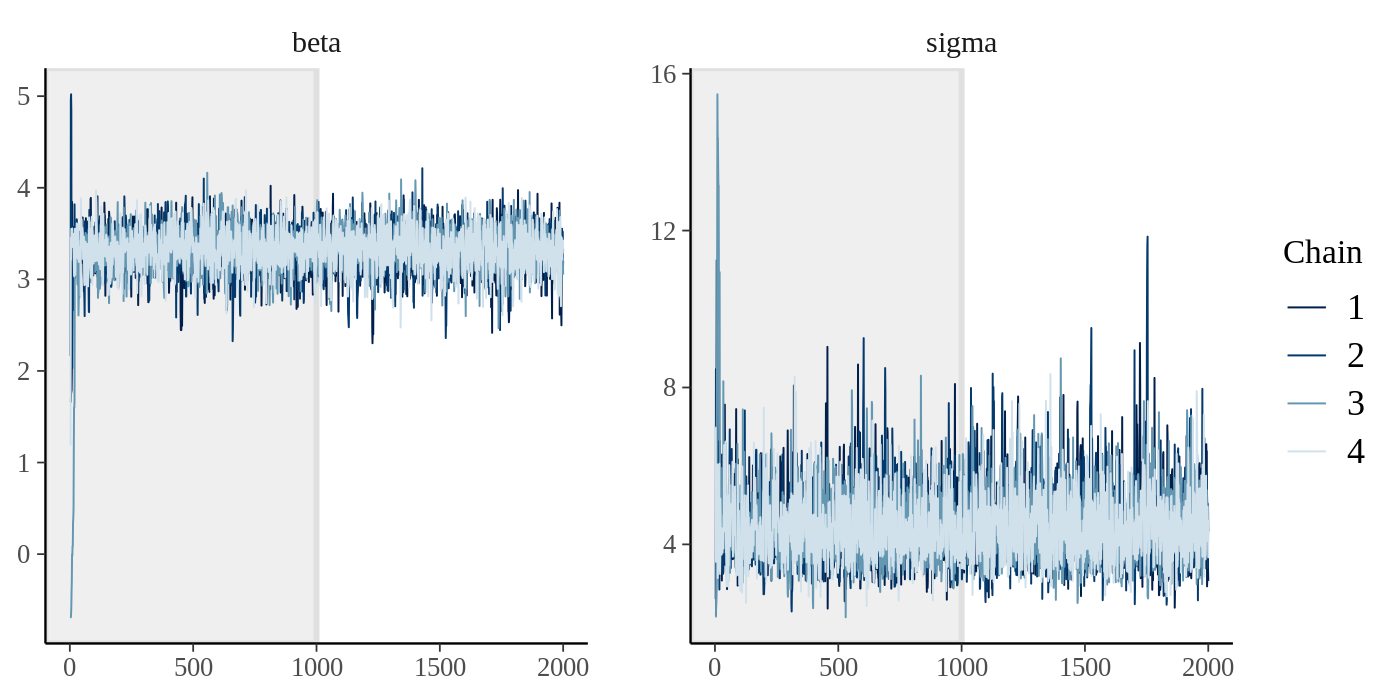

In [34]:
# Construct diagnostic plots
pars <- c("beta", "sigma")
bayesplot::mcmc_trace(fit$draws(inc_warmup = TRUE),
                      n_warmup = 1000, pars = pars)


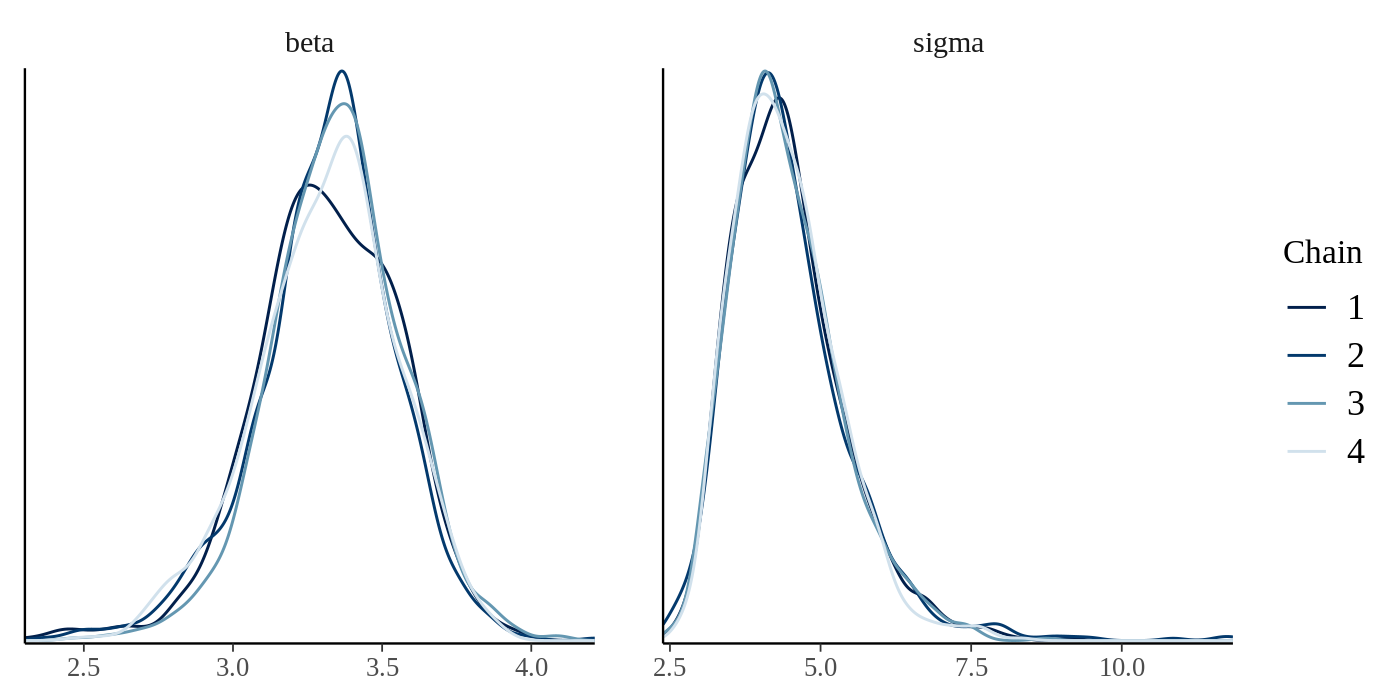

In [35]:
bayesplot::mcmc_dens_overlay(fit$draws(), pars = pars)

In [36]:
# Extract posterior predictive checks
yrep <- as.matrix(
  as_draws_df(fit$draws(variables = c("y_pred"))))
head(yrep)

y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10],.chain,.iteration,.draw
4.35543,-4.62664,22.28290,15.0369,14.98020,16.1622,26.1582,23.3575,20.7602,36.3830,1,1,1
0.24174,9.92861,15.59350,14.7881,16.60720,14.6021,27.9655,30.9029,26.7504,37.1803,1,2,2
-2.22417,9.00338,8.94665,16.1107,19.52710,16.3013,24.5392,31.1134,20.1614,25.3606,1,3,3
1.00189,6.24522,14.04820,16.8644,10.73970,19.3708,29.5804,35.8985,25.5009,34.5484,1,4,4
-2.62043,5.36292,7.03880,12.8718,16.33710,16.0776,21.9526,22.3909,25.6963,34.1007,1,5,5
13.62200,12.54380,16.60120,11.3655,6.50124,23.8941,28.5327,35.2227,22.9183,30.2682,1,6,6


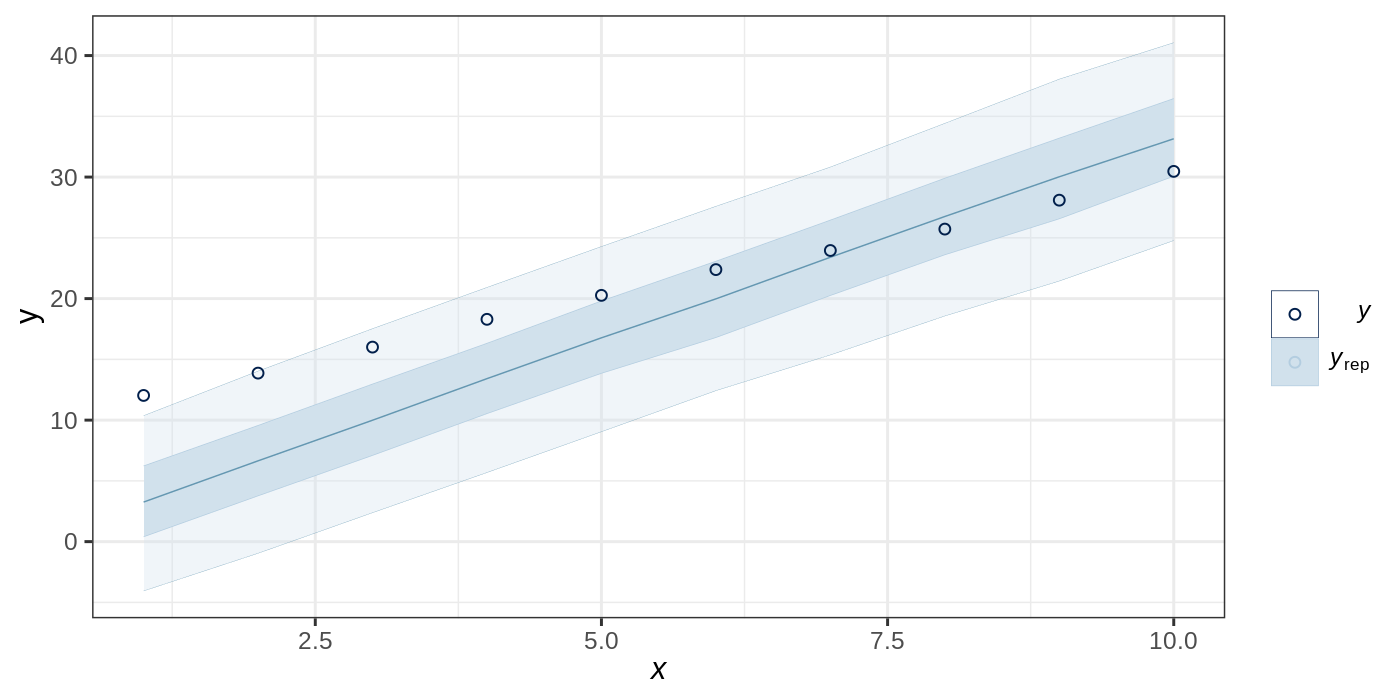

In [37]:
# We don't need the chain, iteration and draw ID, so let's remove them.
yrep <- yrep[, -(11:13)]

# Plot the posterior predictions and compare it to the real data.
bayesplot::ppc_ribbon(y = data$y, yrep = yrep, x = data$x,
                      y_draw = "point") +
  theme_bw() +
  ylab("y")


## Disease Transmission model

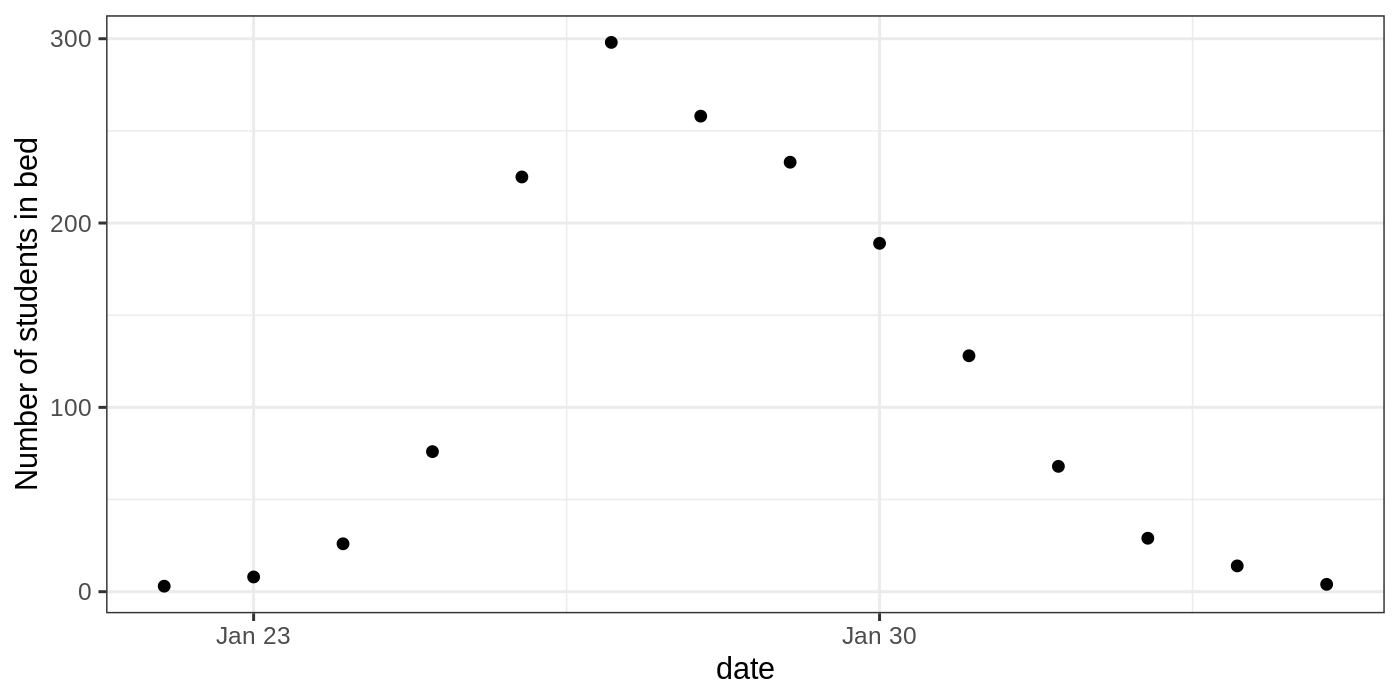

In [38]:
theme_set(theme_bw())
ggplot(data = influenza_england_1978_school) +
  geom_point(mapping = aes(x = date, y = in_bed)) +
  labs(y = "Number of students in bed")


In [39]:
# create a data list to be passed to Stan
cases <- influenza_england_1978_school$in_bed
N <- 763;
n_days <- length(cases)
t <- seq(0, n_days, by = 1)
t0 = 0
t <- t[-1]

#initial conditions
i0 <- 1
s0 <- N - i0
r0 <- 0
y0 = c(S = s0, I = i0, R = r0)

data_sir <- list(n_days = n_days, y0 = y0, t0 = t0, ts = t,
                 N = N, cases = cases)


In [42]:
# define starting distribution
init <- function() {
  list(beta = abs(rnorm(1, mean = 2, sd = 1)),
       gamma = abs(rnorm(1, mean = 0.4, sd = 0.5)),
       phi_inv = rexp(1, rate = 5))
}

# transpile (translate Stan to C++ and then compile)
mod <- cmdstan_model("model/sir.stan")

n_chains <- 4
fit <- mod$sample(data = data_sir,
                  chains = n_chains,
                  parallel_chains = detectCores(),
                  init = init,
                  save_warmup = TRUE)

Running MCMC with 4 chains, at most 2 in parallel...



Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[1] is -2.67779e-07, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sa

Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[3] is -1.05473e-07, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 36, column 2 to column 72)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 36, column 2 to column 72)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning oc

Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[6] is -2.72937e-08, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: neg_binomial_2_lpmf: Location parameter[7] is -2.1522e-08, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: neg_binomial_2_lpmf: Location parameter[1] is -3.35544e-07, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 finished in 6.6 seconds.
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 36, column 2 to column 72)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 36, column 2 to column 72)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning oc

Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 finished in 6.4 seconds.


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 36, column 2 to column 72)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but

Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 36, column 2 to column 72)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: neg_binomial_2_lpmf: Location parameter[1] is -1.59352e-07, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 4 finished in 4.8 seconds.
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: neg_binomial_2_lpmf: Location parameter[2] is -1.87969e-08, but must be positive finite! (in '/tmp/Rtmp6ejkmj/model-9153b3bfb8.stan', line 45, column 2 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 3 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 finished in 10.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 7.1 seconds.
Total execution time: 17.6 seconds.



variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma,0.5394756,0.537557,0.04419731,0.04114956,0.469301,0.6155117,1.0002682,2765.818,2064.266
beta,1.7337364,1.732225,0.05337958,0.05008964,1.650677,1.8230450,1.0007363,2702.821,2265.125
phi,9.6714095,8.332380,5.58724741,4.20720367,3.610378,20.5944100,1.0012834,1917.002,2205.049
R0,3.2341056,3.220180,0.27069562,0.24629693,2.820641,3.7078700,0.9999601,3015.175,2029.423


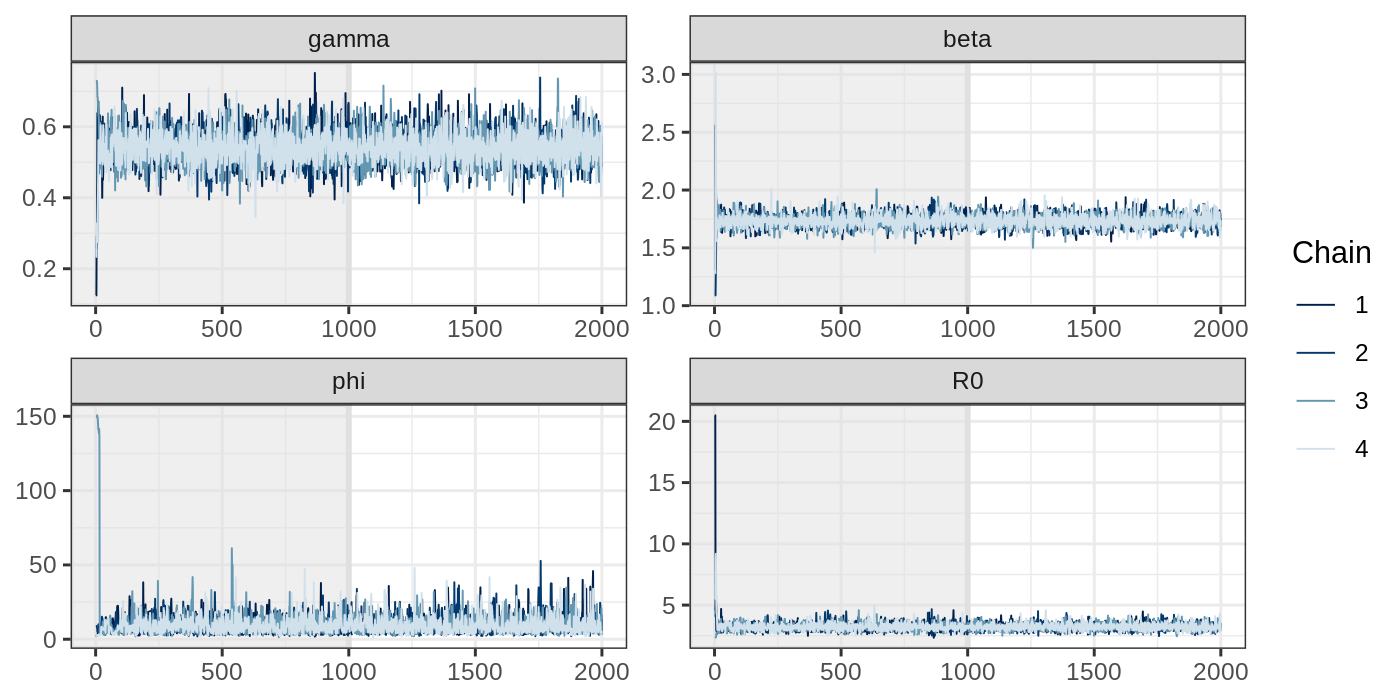

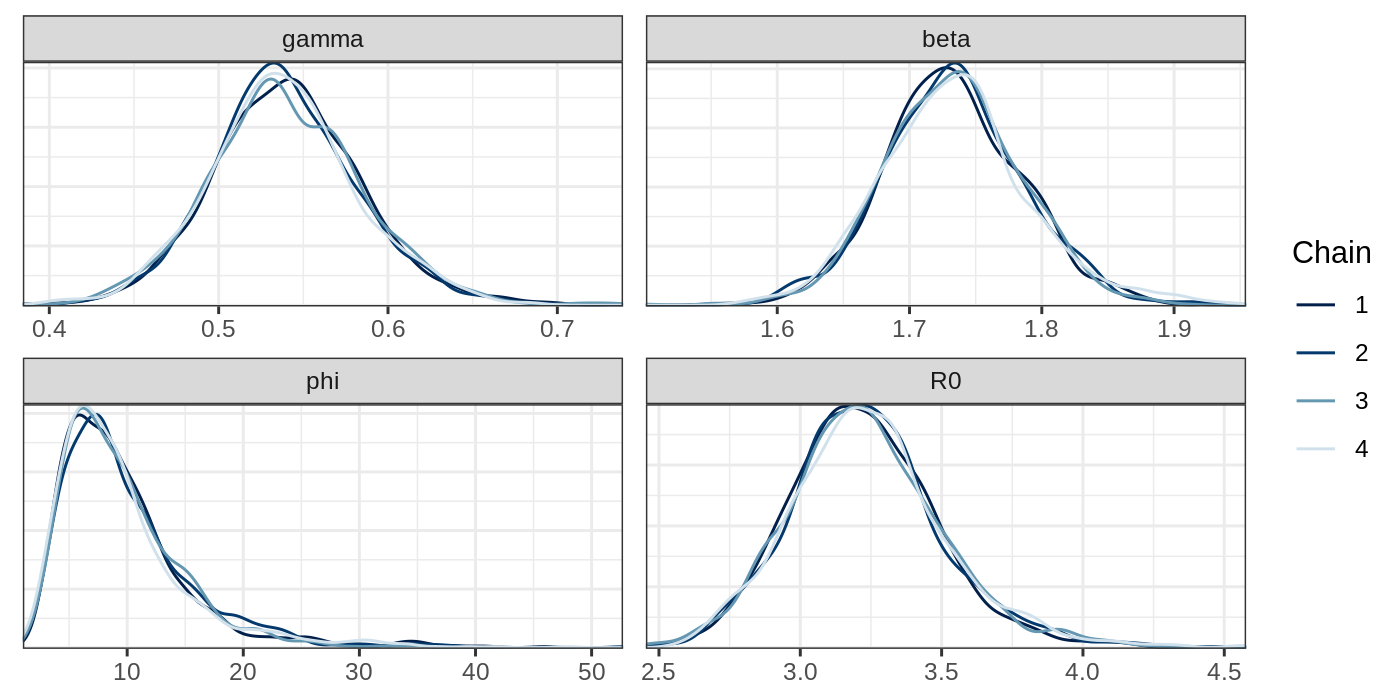

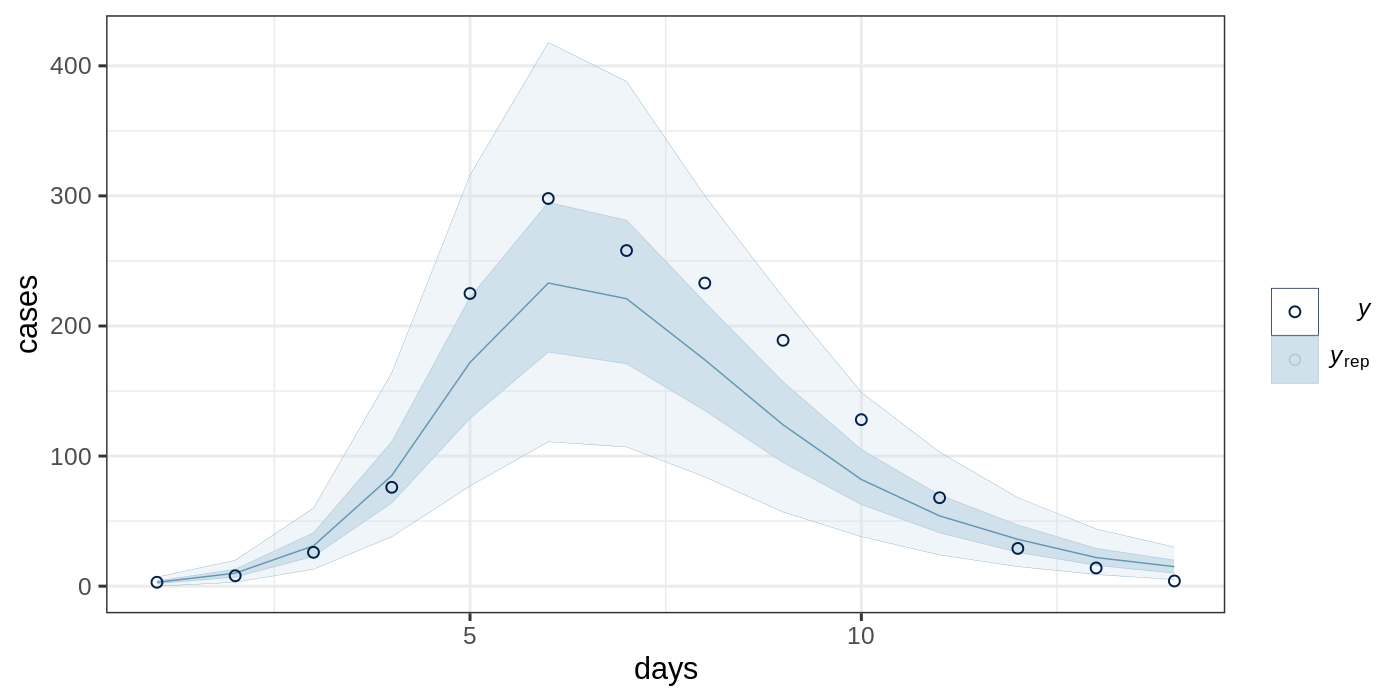

In [43]:
pars <- c("gamma", "beta", "phi", "R0")
fit$summary(variables = pars)

bayesplot::mcmc_trace(fit$draws(inc_warmup = TRUE),
                      n_warmup = 1000, pars = pars)
bayesplot::mcmc_dens_overlay(fit$draws(), pars = pars)

# Extract posterior predictive checks
pred_cases <- as.matrix(
  as_draws_df(fit$draws(variables = c("pred_cases"))))[, -(15:17)]

bayesplot::ppc_ribbon(y = data_sir$cases, yrep = pred_cases,
                      x = data_sir$ts, y_draw = "point") +
  theme_bw() +
  ylab("cases") + xlab("days")

In [44]:
## Run same model with a Poisson likelihood

mod <- cmdstan_model("model/sir_poisson.stan")

fit_poisson <- mod$sample(data = data_sir,
                          chains = n_chains,
                          parallel_chains = detectCores(),
                          init = init,
                          save_warmup = TRUE)


In file included from stan/lib/stan_math/lib/boost_1.84.0/boost/concept/assert.hpp:35,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/concept_check.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/range/concepts.hpp:19,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/range/size_type.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/range/size.hpp:21,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/range/functions.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/range.hpp:18,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/odeint/util/resize.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/odeint/util/state_wrapper.hpp:26,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/odeint/util/ublas_wrapper.hpp:33,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/odeint.hpp:25,
     

Running MCMC with 4 chains, at most 2 in parallel...



Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning oc

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning oc

Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1900 / 2000 [ 95%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -nan, but must be nonnegative! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 45, column 2 to column 25)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -nan, but must be nonnegative! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 45, column 2 to column 25)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this wa

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chai

Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: poisson_lpmf: Rate parameter[1] is -9.22613e-08, but must be nonnegative! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 45, column 2 to column 25)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[1] is -2.90837e-08, but must be nonnegative! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 45, column 2 to column 25)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is

Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: poisson_lpmf: Rate parameter[4] is -6.15711e-09, but must be nonnegative! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 45, column 2 to column 25)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 finished in 9.9 seconds.
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: ode_rk45: ode parameters and data is inf, but must be finite! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning oc

Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 3 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 finished in 7.9 seconds.
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 36, column 2 to column 72)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: poisson_lpmf: Rate parameter[13] is -8.54628e-08, but must be nonnegative! (in '/tmp/Rtmp6ejkmj/model-917bec9e6b.stan', line 45, column 2 to column 25)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler i

Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1900 / 2000 [ 95%]  (Sampling) 


variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma,0.4762838,0.476193,0.01127836,0.01130408,0.4574386,0.4947704,1.001580,2625.600,2198.304
beta,1.6894479,1.689305,0.01521765,0.01486306,1.6639975,1.7145110,1.000333,2927.220,2574.453
phi,54.8663784,7.146650,769.05904805,6.51584167,1.7424960,92.1494650,1.000892,2215.945,1545.383
R0,3.5489215,3.547500,0.08111270,0.08168385,3.4158130,3.6856005,1.000511,3011.355,2684.445


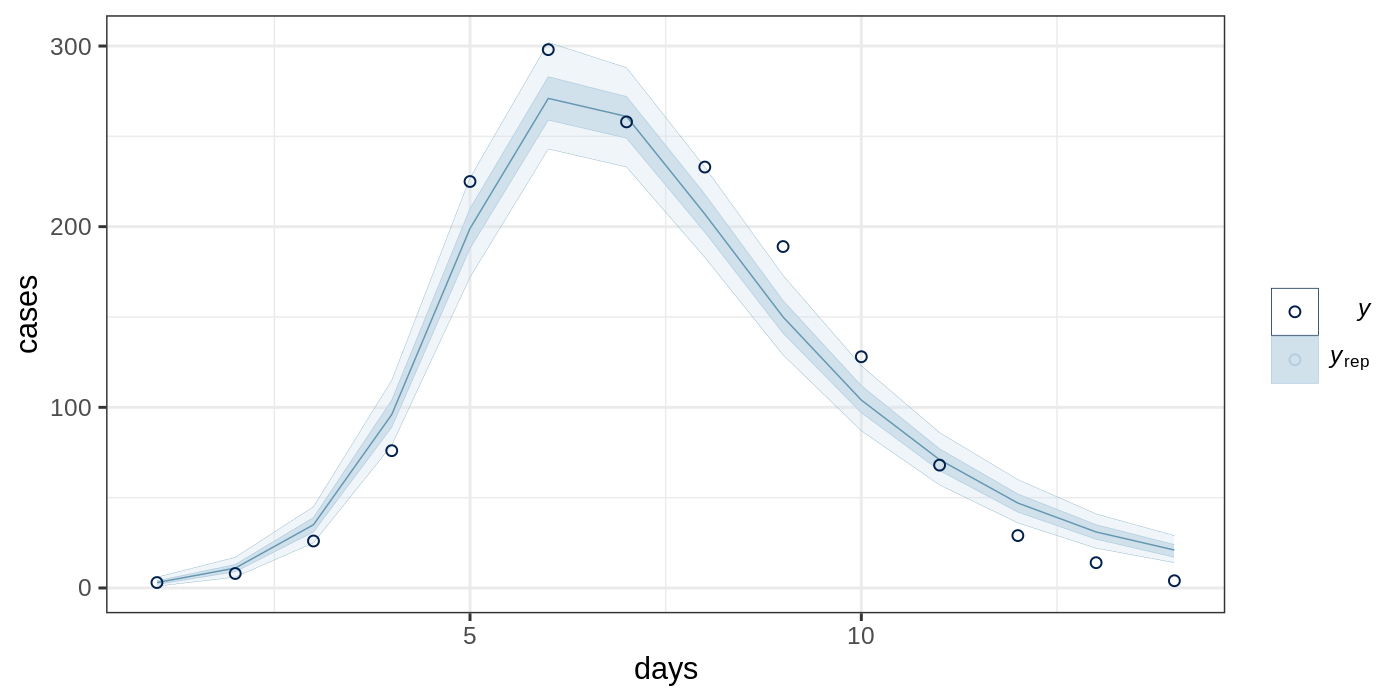

In [45]:
fit_poisson$summary(variables = pars)

pred_cases_poisson <- as.matrix(
  as_draws_df(fit_poisson$draws(variables = c("pred_cases"))))[, -(15:17)]

bayesplot::ppc_ribbon(y = data_sir$cases, yrep = pred_cases_poisson,
                      x = data_sir$ts, y_draw = "point") +
  theme_bw() +
  ylab("cases") + xlab("days")

In [46]:
# compute PSIS-loo estimate

log_lik_draws <- fit$draws("log_lik")
loo_estimate <- loo(log_lik_draws, r_eff = relative_eff(log_lik_draws))


log_lik_draws_poisson <- fit_poisson$draws("log_lik")
loo_estimate_poisson <-
  loo(log_lik_draws_poisson, r_eff = relative_eff(log_lik_draws_poisson))

print(loo_estimate_poisson)
print(loo_estimate)


Computed from 4000 by 14 log-likelihood matrix.

         Estimate   SE
elpd_loo    -82.8 11.1
p_loo         9.4  2.1
looic       165.6 22.1
------
MCSE of elpd_loo is 0.1.
MCSE and ESS estimates assume MCMC draws (r_eff in [0.5, 0.9]).

All Pareto k estimates are good (k < 0.7).
See help('pareto-k-diagnostic') for details.

Computed from 4000 by 14 log-likelihood matrix.

         Estimate   SE
elpd_loo    -64.1  5.1
p_loo         2.8  1.1
looic       128.3 10.2
------
MCSE of elpd_loo is 0.1.
MCSE and ESS estimates assume MCMC draws (r_eff in [0.4, 0.9]).

All Pareto k estimates are good (k < 0.7).
See help('pareto-k-diagnostic') for details.
